In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85658,60872.0,1.183527,0.114000,0.369482,0.948206,-0.195733,-0.260104,-0.037489,-0.064134,0.240757,...,-0.219752,-0.736053,-0.030552,-0.490013,0.394865,-0.576240,0.027500,0.034082,49.99,0
185739,126804.0,1.970477,-1.218507,-0.694352,-0.587293,-0.915712,0.181783,-1.022249,0.200127,-0.063794,...,-0.576981,-1.395036,0.455631,0.258447,-0.793785,0.201101,-0.045513,-0.036322,79.95,0
66968,52304.0,-1.909578,2.131721,-0.167846,-0.554188,0.196994,-0.343984,0.404653,0.333412,0.971701,...,-0.566626,-1.144424,-0.111288,-1.114811,0.302296,0.162553,0.568675,0.210581,8.99,0
176471,122783.0,-0.439760,1.004950,-0.104627,-0.780148,0.990168,-0.002135,0.581410,0.117860,-0.011344,...,-0.064649,-0.093943,-0.071412,0.131582,-0.200036,0.342464,0.010103,0.103845,2.76,0
159606,112714.0,-1.375719,0.450205,-0.790460,0.076028,1.818891,-1.030809,1.047542,-0.387716,0.737646,...,-0.302134,0.065688,0.231638,0.434628,-0.141306,-0.341124,0.240622,0.256856,22.00,0


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/anaconda3/envs/deeplearning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


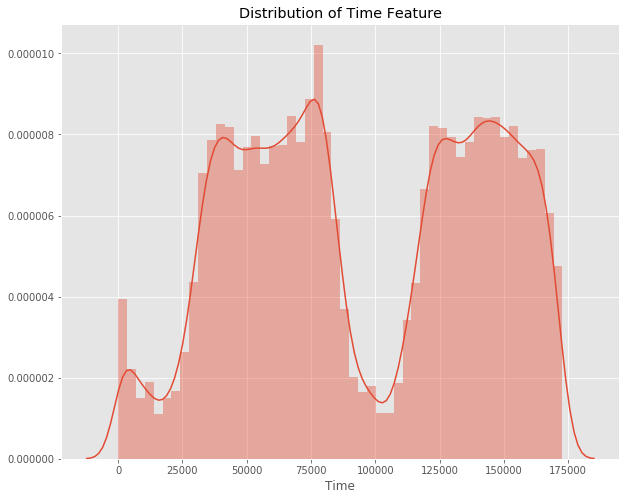

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

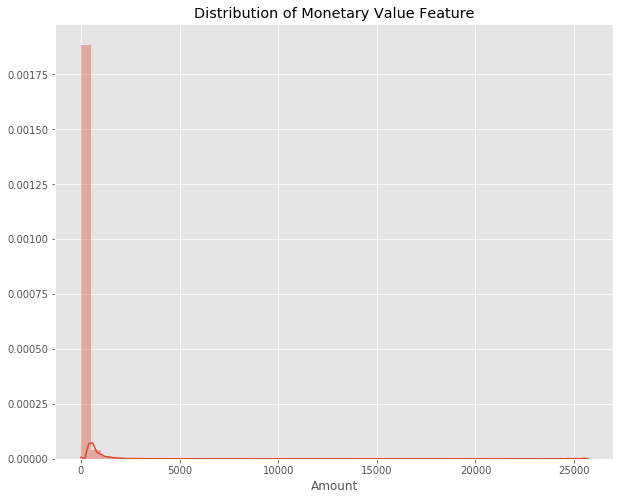

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [9]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

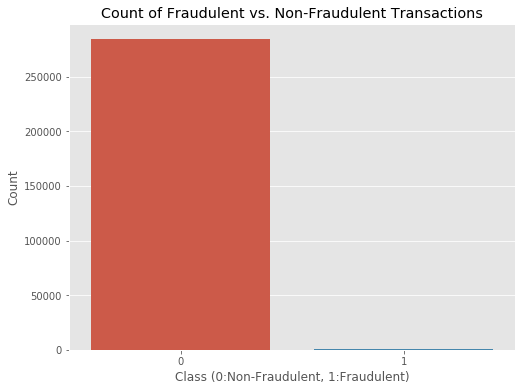

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

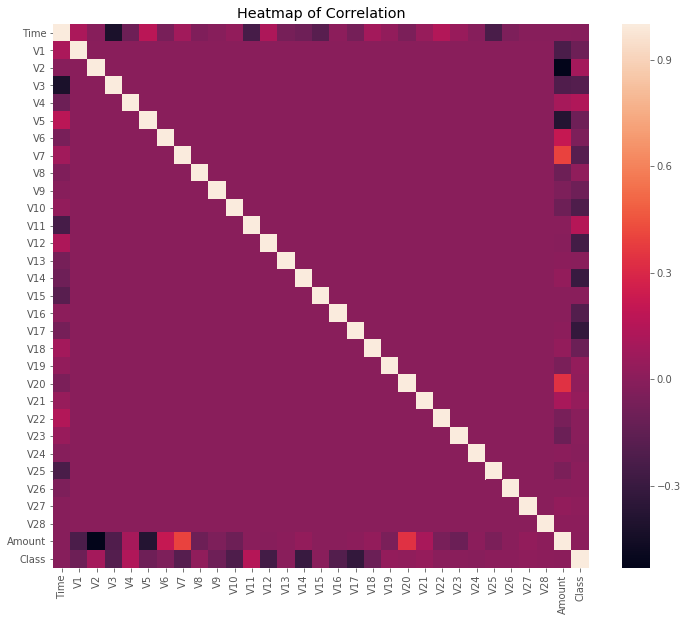

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [13]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [15]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
245341,152708.0,0.714,-2.979,-1.464,1.174,-1.484,0.027,0.121,-0.119,-0.039,...,-3.097e-01,0.638,-0.476,-0.774,-0.085,0.096,721.20,0,2.530,1.219
259048,158934.0,-0.349,1.064,-0.181,-0.730,0.369,-0.650,0.620,0.340,-0.576,...,8.735e-02,-0.323,-0.421,0.140,0.120,0.020,13.99,0,-0.297,1.350
45620,42427.0,1.159,-0.046,-0.080,1.542,1.717,4.414,-1.123,1.162,-0.022,...,-3.680e-04,0.993,0.453,-0.029,0.043,0.031,11.99,0,-0.305,-1.103
155482,105546.0,-0.694,0.470,0.349,-0.886,-0.756,0.306,1.222,-0.036,1.635,...,1.530e-01,-0.371,-0.986,-0.933,-0.033,-0.093,258.29,0,0.679,0.226
249568,154471.0,2.062,-0.017,-1.052,0.414,-0.107,-1.208,0.216,-0.362,0.471,...,3.356e-01,0.059,-0.284,0.194,-0.068,-0.059,1.98,0,-0.345,1.256


In [17]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256477, 31)
Test Shape: (28330, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 436 fraudulent transactions in the train data.


In [21]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
118305,1.291,0.025,-0.165,-0.007,-0.237,-1.064,0.250,-0.218,0.162,-0.107,...,-1.542,0.143,-0.142,0.114,0.656,-0.114,-2.584e-04,0,-0.234,-0.320
86296,1.174,0.101,0.565,0.580,-0.582,-0.774,-0.068,-0.059,-0.146,0.119,...,-0.150,0.036,0.548,0.281,0.230,-0.038,9.942e-03,0,-0.281,-0.618
67904,-1.201,-0.658,2.188,0.416,0.060,-0.056,-0.079,-0.096,0.360,-0.063,...,0.920,0.318,-0.273,-0.301,0.638,-0.097,-5.966e-02,0,0.018,-0.816
169774,1.617,-1.242,-1.671,-0.596,0.317,0.994,-0.149,0.165,1.487,-0.729,...,1.402,-0.157,-0.169,0.095,1.111,-0.048,-5.200e-02,0,0.374,0.700
171590,1.365,-1.069,-2.172,0.627,-0.045,-0.709,0.513,-0.263,1.019,-0.998,...,-0.725,-0.097,0.557,-0.166,-0.154,-0.079,4.489e-02,0,1.082,0.718


In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.223,0.252,0.165,0.933,-0.119,-0.473,0.059,-0.023,-0.143,0.206,...,0.118,-0.143,-0.005,0.676,-0.323,0.005,0.005,0,-0.334,-0.950
1,-0.417,4.700,-7.522,7.672,0.261,-2.647,-2.854,0.959,-4.589,-6.121,...,-0.438,-0.090,-0.743,-0.312,0.503,0.821,0.372,1,-0.350,1.387
2,-4.992,5.213,-9.111,8.432,-3.436,-1.828,-7.114,3.431,-3.876,-6.869,...,0.248,0.294,-0.549,-0.175,0.407,-0.402,-0.883,1,-0.353,0.165
3,-1.344,1.115,1.409,1.516,-0.790,1.269,-0.837,1.317,0.144,-0.640,...,-0.351,0.101,-0.302,-0.347,-0.451,-0.268,-0.002,0,-0.315,-1.944
4,-2.457,-2.252,1.979,1.383,1.980,-1.958,-1.786,0.147,0.594,0.033,...,0.628,-0.214,0.519,-0.451,0.509,0.165,0.304,0,-0.294,-0.625
5,1.457,-0.556,-0.607,-0.939,-0.211,-0.486,-0.223,-0.227,-0.822,0.667,...,0.050,-0.310,-1.002,0.821,-0.062,-0.030,-0.002,0,-0.145,-0.952
6,0.288,1.729,-1.652,3.814,-1.091,-0.985,-2.202,0.555,-2.034,-2.734,...,-0.634,0.093,0.188,0.369,-0.132,0.577,0.310,1,-0.353,-1.308
7,-0.680,4.673,-6.815,7.144,0.929,-1.873,-2.307,0.994,-4.944,-5.576,...,-0.322,-0.281,-1.120,-0.073,0.554,0.761,0.387,1,-0.350,1.260
8,-1.554,1.694,-0.903,2.425,-2.900,0.133,-0.286,0.556,-1.395,-2.893,...,0.733,0.202,0.492,-0.184,-0.200,0.395,0.028,1,1.086,-0.944
9,-5.767,-8.402,0.057,6.951,9.881,-5.773,-5.749,0.722,-1.076,2.689,...,-0.130,2.241,0.665,-1.890,-0.121,0.073,0.584,1,-0.353,1.499


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

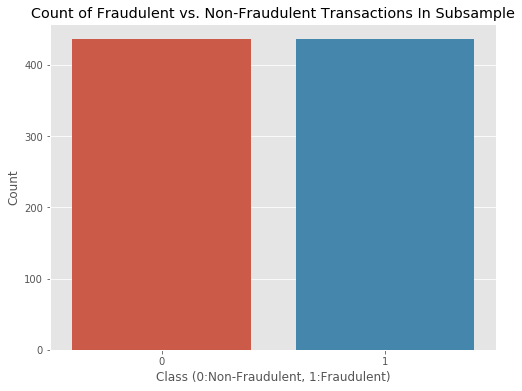

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.404
V2,0.431
V3,-0.573
V4,0.706
V5,-0.372
V6,-0.360
V7,-0.470
V8,0.056
V9,-0.545
V10,-0.635


In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.573
V9,-0.545
V10,-0.635
V12,-0.691
V14,-0.755
V16,-0.593
V17,-0.555


In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.706
V11,0.694
Class,1.000


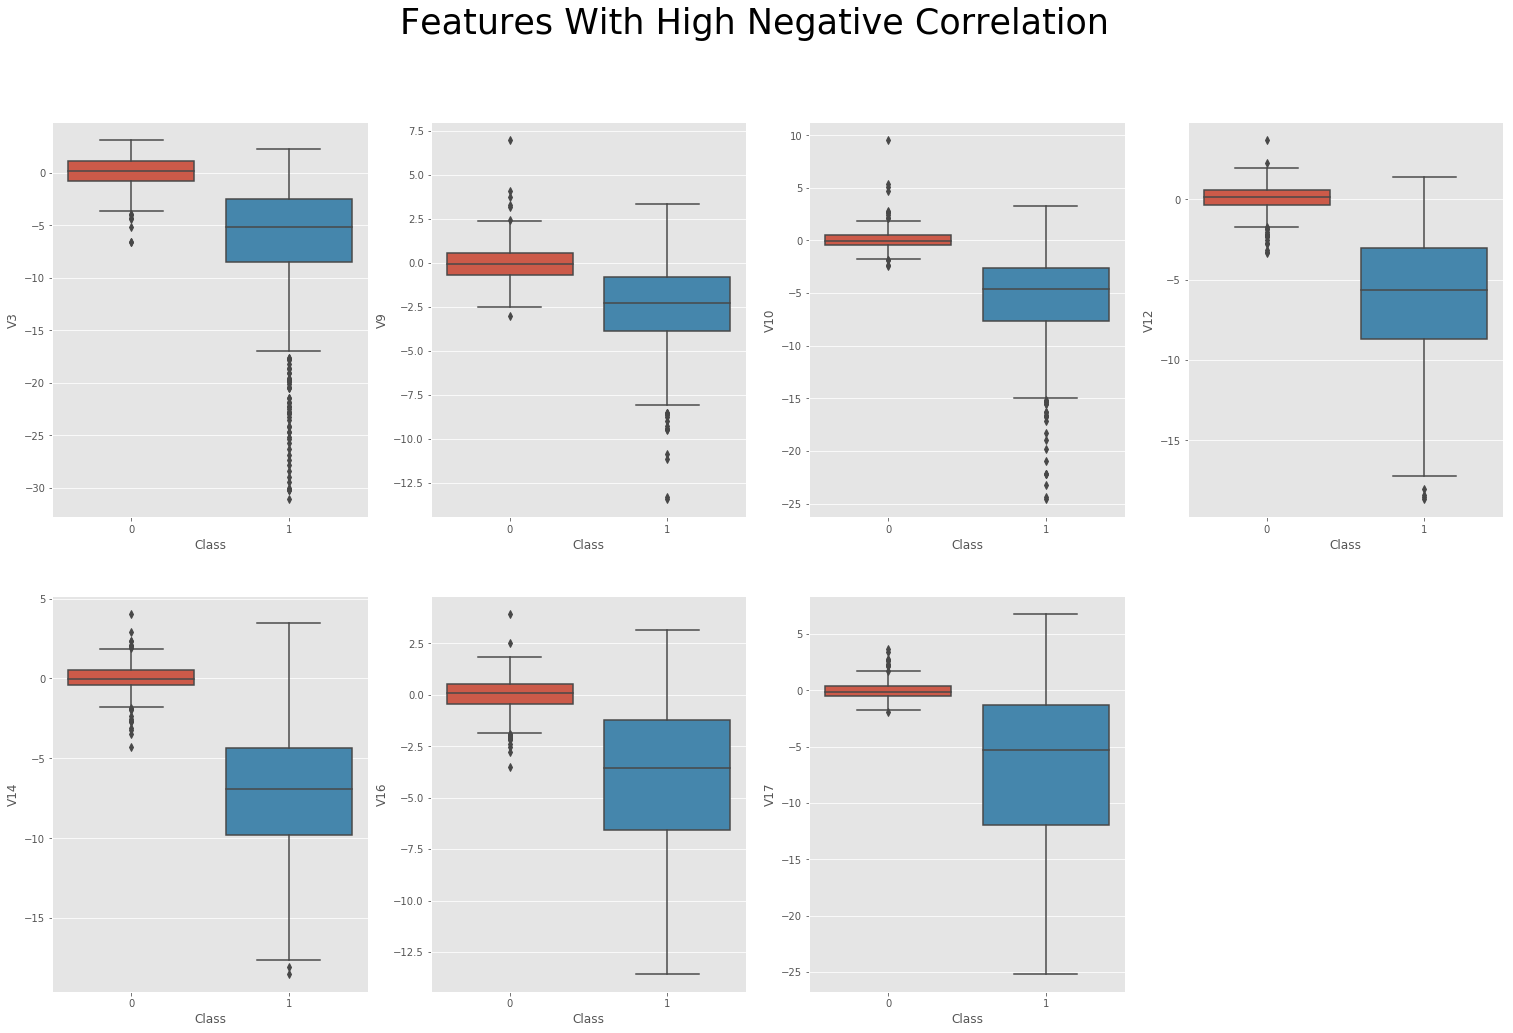

In [30]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

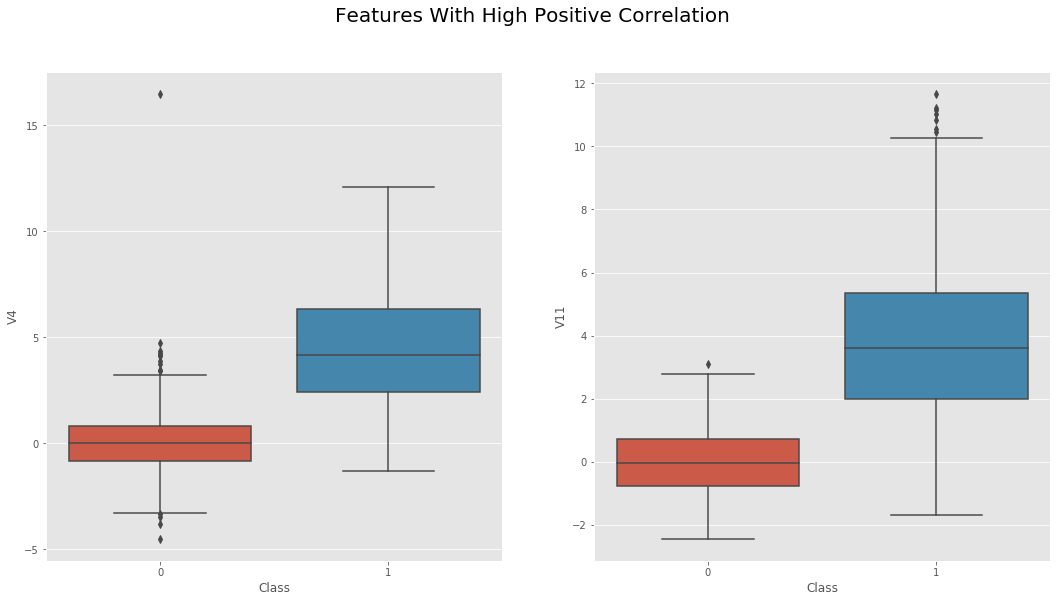

In [31]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [32]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 872 transactions by 247 transactions to 625 transactions.


**Dimensionality Reduction**

In [34]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [35]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

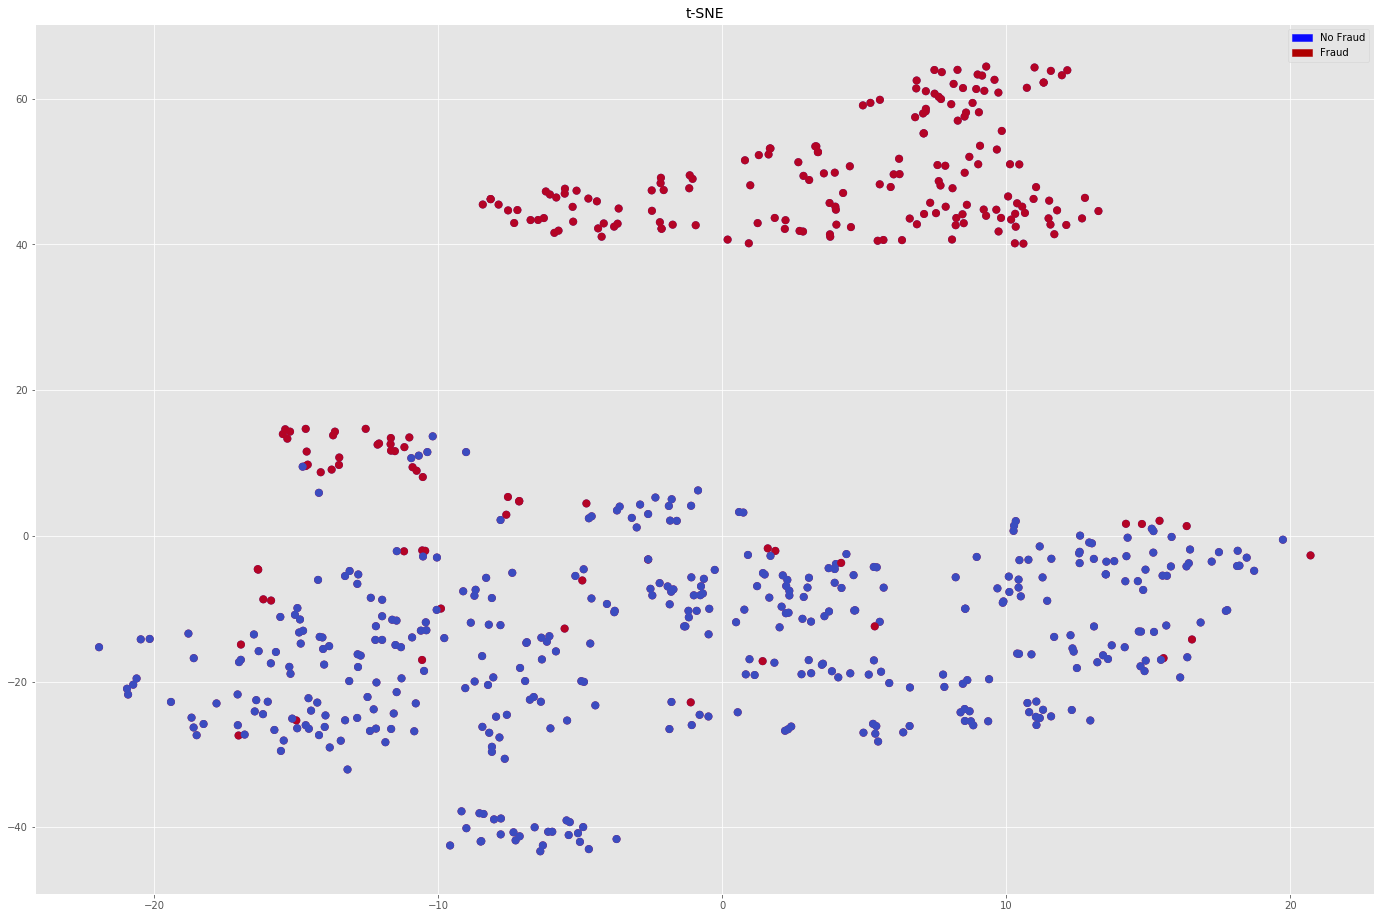

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [38]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [40]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (500, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (500,) (125,)


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.969935 (0.015809)
LDA: 0.971031 (0.018132)
KNN: 0.952787 (0.029242)
CART: 0.903660 (0.032223)
SVM: 0.966792 (0.015858)
XGB: 0.968781 (0.025161)
RF: 0.964089 (0.022961)


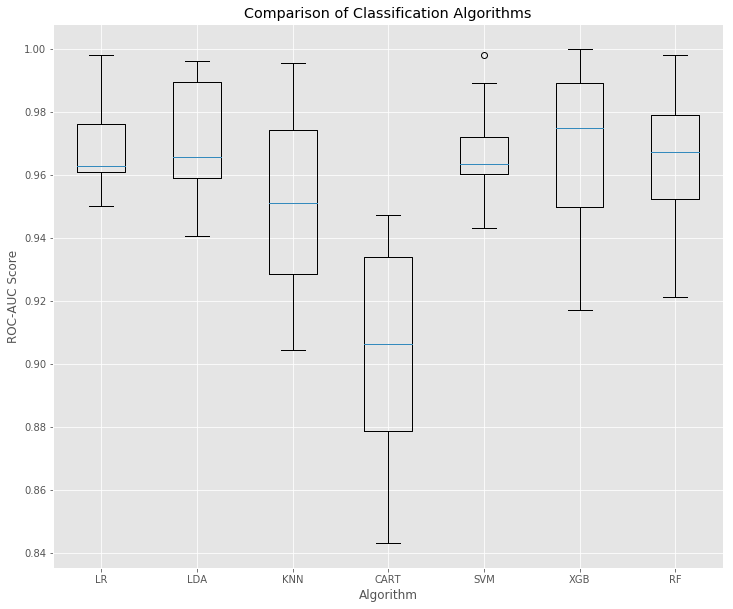

In [43]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [44]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'